In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt 

num_taps = 51 # порядок фильтра
cut_off = 3000 # Hz
sample_rate = 32000 # Hz

# Фильтр нижних частот
h = signal.firwin(num_taps, cut_off, nyq=sample_rate/2)

# num_taps - количество выборок (точек) фильтра. Оно определяет длину фильтра и влияет на его характеристики. Чем больше num_taps, тем более точное определение фильтра, но и больше вычислительная сложность.
# cut_off - частота среза фильтра. Она определяет частоту, на которой фильтр начинает подавлять сигнал.
# nyq - частота Найквиста (Nyquist frequency), определенная как половина частоты дискретизации (sample_rate). В этом контексте используется для нормирования частоты среза и обеспечения представления частоты среза относительно полосы пропускания (от 0 до 1).
# Функция signal.firwin() создает фильтр с конечной импульсной характеристикой (FIR) с использованием заданных параметров и возвращает его в переменной `h`

# plot the impulse response
plt.plot(h, '.-')
plt.grid(True)
plt.show()

C:\Users\Дарья\AppData\Local\Temp\ipykernel_21932\52209112.py:10: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  h = signal.firwin(num_taps, cut_off, nyq=sample_rate/2)


На графике представлена импульсная характеристка фильтра, построенная массивом чисел (коэффициентов) от времени. Простое построение этого массива чисел с плавающей запятой дает нам импульсную характеристику фильтра

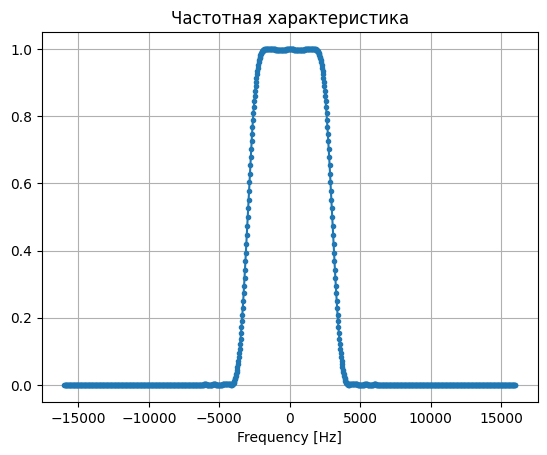

In [3]:
# plot the frequency response
H = np.abs(np.fft.fft(h, 1024)) # Вычисляем частотную характеристику с использованием 1024-точечного БПФ и вычисляем ее амплитуду
H = np.fft.fftshift(H) # Сдвигаем полученную частотную характеристику, чтобы центральная частота была в центре графика
w = np.linspace(-sample_rate/2, sample_rate/2, len(H)) # Создаем массив частот, начиная от -sample_rate/2, заканчивая sample_rate/2 с шагом, соответствующим длине H.
plt.plot(w, H, '.-')
plt.title("Частотная характеристика")
plt.xlabel("Frequency [Hz]")
plt.grid(True)
plt.show()

В данном примере происходит сдвиг фильтра в частотной области путем умножения на экспоненту.Задается значение `f0`, которое будет использоваться для сдвига.


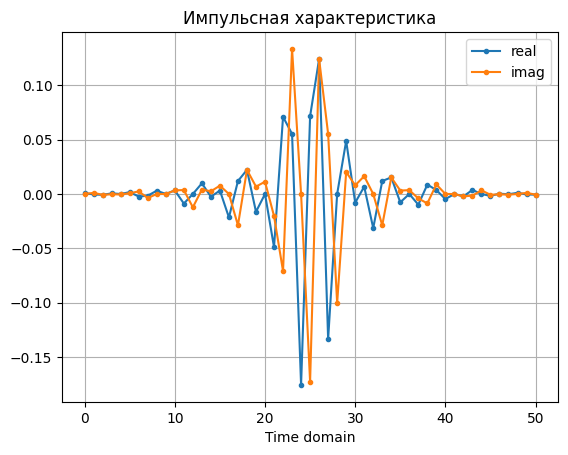

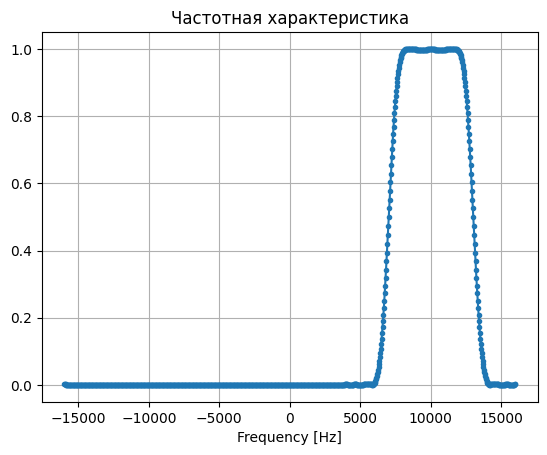

In [4]:

f0 = 10e3 
Ts = 1.0/sample_rate # Вычисляется период выборки Ts
t = np.arange(0.0, Ts*len(h), Ts) # Создается вектор времени t
exponential = np.exp(2j*np.pi*f0*t) # Выполняется сдвиг фильтра h на частоте f0

h_band_pass = h * exponential # do the shift

# plot impulse response
plt.figure('impulse')
plt.xlabel('Time domain')
plt.grid(True)
plt.title("Импульсная характеристика")
plt.plot(np.real(h_band_pass), '.-')
plt.plot(np.imag(h_band_pass), '.-')
plt.legend(['real', 'imag'], loc=1)

# plot the frequency response
H = np.abs(np.fft.fft(h_band_pass, 1024)) # take the 1024-point FFT and magnitude
H = np.fft.fftshift(H) # make 0 Hz in the center
w = np.linspace(-sample_rate/2, sample_rate/2, len(H)) # x axis
plt.figure('freq')
plt.plot(w, H, '.-')
plt.grid(True)
plt.title("Частотная характеристика")
plt.xlabel('Frequency [Hz]')
plt.show()

Для проектирования КИХ-фильтра в данном примере сначала создают вектора желаемой частотной характеристики. Далее представлен код проектирования фильтра нижних частот произвольной формы.

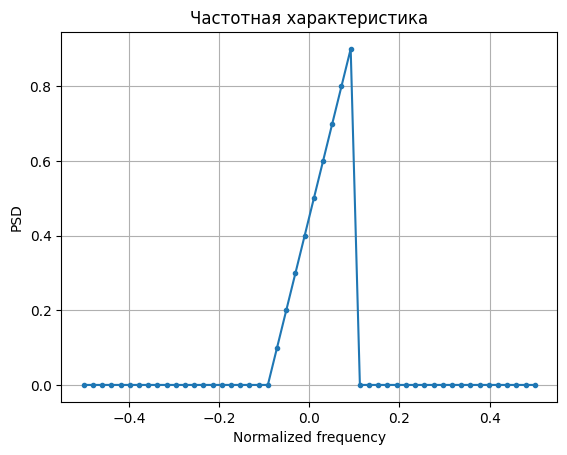

In [5]:

H = np.hstack((np.zeros(20), np.arange(10)/10, np.zeros(20))) # объединения массивов
w = np.linspace(-0.5, 0.5, 50)
plt.plot(w, H, '.-')
plt.grid(True)
plt.title("Частотная характеристика")
plt.xlabel('Normalized frequency')
plt.ylabel('PSD')
plt.show()

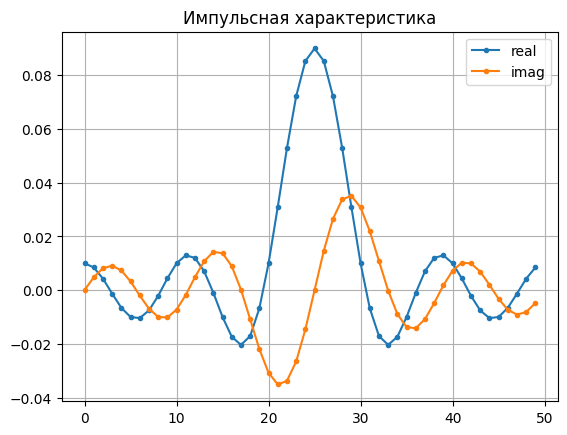

In [6]:
# импульсная характеристика
h = np.fft.ifftshift(np.fft.ifft(np.fft.ifftshift(H)))
plt.plot(np.real(h), '.-')
plt.plot(np.imag(h), '.-')
plt.legend(['real','imag'], loc=1)
plt.grid(True)
plt.title("Импульсная характеристика")
plt.show()

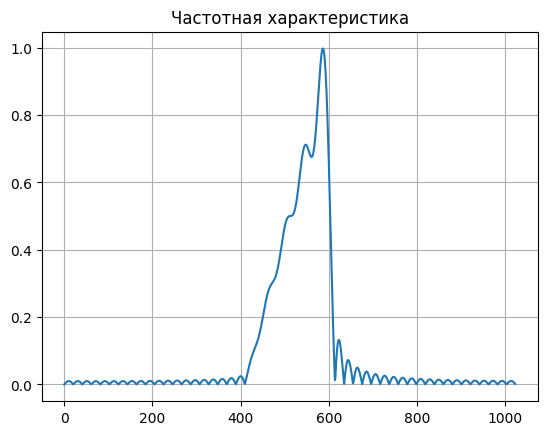

In [7]:
# частотная характеристика
H_fft = np.fft.fftshift(np.abs(np.fft.fft(h, 1024)))
# np.fft.fft(h, 1024) - выполняет прямое преобразование Фурье для входного сигнала `h` размером 1024 точки.
# np.abs() - применяет операцию модуля для полученного преобразования Фурье. Позволяет получить амплитуды комплексных чисел.
# np.fft.fftshift()` - сдвигает полученные амплитуды таким образом, чтобы нулевая частота была посередине массива.
# Результат сохраняется в переменную `H_fft`.
plt.plot(H_fft)
plt.grid(True)
plt.title("Частотная характеристика")
plt.show()

Видно, что получившаяся частотная характеристика отличается от заданной вначале (которую нужно воспроизвести). Для сглаживания частотной характеристики необходимо сделать так, чтобы она затухала до 0 с обеих сторон. Ниже метод, который включает в себя умножение нашей импульсной характеристики на «оконную функцию», которая начинается и заканчивается нулем.

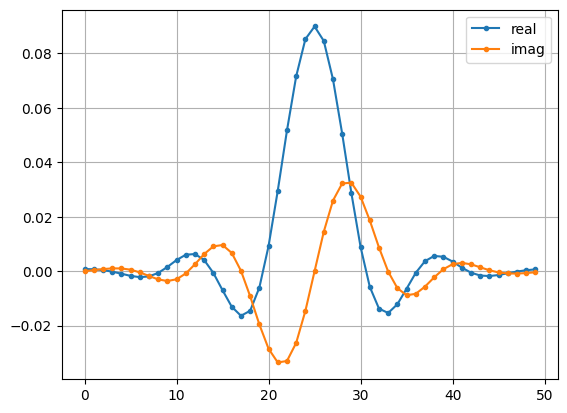

In [8]:
# After creating h using the previous code, create and apply the window
h = np.fft.ifftshift(np.fft.ifft(np.fft.ifftshift(H)))

window = np.hamming(len(h))
h = h * window
plt.plot(np.real(h), '.-')
plt.plot(np.imag(h), '.-')
plt.legend(['real','imag'], loc=1)
plt.grid(True)
plt.show()
# частотная характеристика
H_fft = np.fft.fftshift(np.abs(np.fft.fft(h, 1024)))
plt.plot(H_fft)
plt.grid(True)
plt.title("Частотная характеристика")
plt.show()

Еще одним методом является повтор генерирования импульсной характеристики, используя больше точек, чтобы у нее было время затухать. 

In [11]:
H = np.hstack((np.zeros(200), np.arange(100)/100, np.zeros(200))) # использование большего числа точек
w = np.linspace(-0.5, 0.5, 500)
plt.plot(w, H, '.-')
plt.grid(True)
plt.title("Частотная характеристика")
plt.show()


